# 暂时使用的功能

* 输出log到terminal；
* 输出log到指定的文件中；
* 同时将log输出到终端和指定的文件中

**参考**

[1](https://blog.csdn.net/w5688414/article/details/100882268)
[2](https://www.cnblogs.com/xianyulouie/p/11041777.html)
[3](https://blog.csdn.net/pansaky/article/details/90710751)

## 日志级别顺序
CRITICAL > ERROR > WARNING > INFO > DEBUG > NOTSET
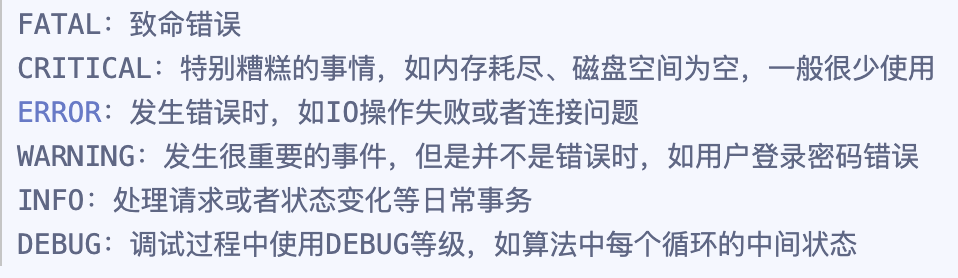

## 简单的log使用
仅仅是打印log到控制台
```python
import logging
logging.basicConfig(level=logging.INFO, # 大于等于logging.INFO级别的都可以打印出来
                    format='%(asctime)s|%(name)s|%(levelname)s|%(message)s' # 日期 时间|函数名|log级别|打印内容|
                    )
logging.critical('critical')
logging.error('error')
logging.warning('warning')
logging.info('info')
logging.debug('debug')
```

## 复杂的使用
既打印到控制台又输出到文件中

1、Logging.Logger：Logger是Logging模块的主体，进行以下三项工作：
> 1. 为程序提供记录日志的接口
> 2. 判断日志所处级别，并判断是否要过滤
> 3. 根据其日志级别将该条日志分发给不同handler

常用函数有：
> * Logger.setLevel() -> 设置日志级别
> * Logger.addHandler() 和 Logger.removeHandler() -> 添加和删除一个Handler
> * Logger.addFilter() -> 添加一个Filter,过滤作用
> * Logging.Handler -> Handler基于日志级别对日志进行分发，如设置为WARNING级别的Handler只会处理WARNING及以上级别的日志。

常用函数有：
> * setLevel() 设置级别
> * setFormatter() 设置Formatter

------------------------------
2、Logging.Formatter：这个类配置了日志的格式，在里面自定义设置日期和时间，输出日志的时候将会按照设置的格式显示内容。

---------------
3、handler


In [1]:
import logging
logger = logging.getLogger('try_demo')

formatter = logging.Formatter('%(asctime)s|%(name)s|%(levelname)s|%(message)s')# 日期 时间|函数名|log级别|打印内容|
 
# Setup file handler
fhandler  = logging.FileHandler('/Users/macuser/Desktop/try_demo.log',mode='w') #a:每次在这个文件追加/w:每次重写 
fhandler.setLevel(logging.DEBUG)
fhandler.setFormatter(formatter)
 
# Configure stream handler for the cells
chandler = logging.StreamHandler()
chandler.setLevel(logging.DEBUG)
chandler.setFormatter(formatter)
 
# Add both handlers
logger.addHandler(fhandler)
logger.addHandler(chandler)
logger.setLevel(logging.DEBUG)
 
# Show the handlers
logger.handlers
 
# Log Something
logger.info("Test info")
logger.debug("Test debug")
logger.error("Test error")

2022-09-17 14:36:31,006|try_demo|INFO|Test info
2022-09-17 14:36:31,011|try_demo|DEBUG|Test debug
2022-09-17 14:36:31,017|try_demo|ERROR|Test error


In [2]:
logger.handlers

[<FileHandler /Users/macuser/Desktop/try_demo.log (DEBUG)>,
 <StreamHandler stderr (DEBUG)>]